In [156]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing training set
df = pd.read_excel('train_cropstatus.xlsx')
df.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


In [7]:
#cheking data types and non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  int64  
 1   Insects                     80000 non-null  int64  
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  int64  
 5   Does_count                  80000 non-null  int64  
 6   Number_of_Weeks_Used        71945 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  int64  
 8   Season                      80000 non-null  int64  
 9   Crop_status                 80000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ MB


In [8]:
#checking data_types which are catergory
df.describe(include='object')

,Crop,Soil
count,80000,80000
unique,2,2
top,Food,clay
freq,57333,43556


In [9]:
#checking data_types which are numeric
df.describe(include= np.number)

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
count,80000.000000,80000.000000,80000.000000,80000.000000,71945.000000,80000.000000,80000.000000,80000.000000
mean,40000.500000,1400.020875,2.267587,25.846750,28.664480,9.549088,1.897575,0.192312
std,23094.155105,849.792471,0.463748,15.557246,12.424751,9.905547,0.702079,0.455912
min,1.000000,150.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20000.750000,731.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,40000.500000,1212.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,60000.250000,1898.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,80000.000000,4097.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [11]:
#checking for null values
df.isnull().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

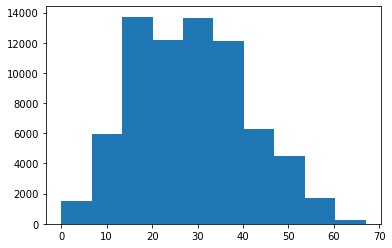

In [14]:
#checking 'Number_of_Weeks_Used'  and replace with suitable mean
plt.hist(df.Number_of_Weeks_Used)
plt.show()

In [15]:
# replacing missing values by mean
df['Number_of_Weeks_Used'].fillna((df['Number_of_Weeks_Used'].mean()), inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  int64  
 1   Insects                     80000 non-null  int64  
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  int64  
 5   Does_count                  80000 non-null  int64  
 6   Number_of_Weeks_Used        80000 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  int64  
 8   Season                      80000 non-null  int64  
 9   Crop_status                 80000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ MB


# Every null values have been removed

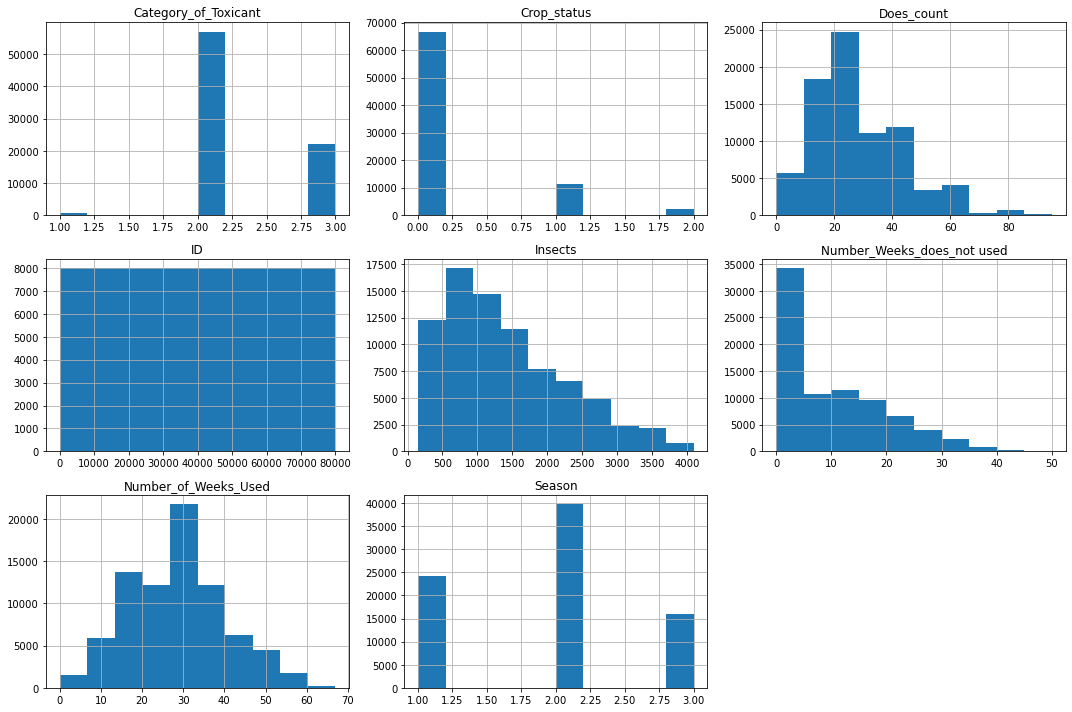

In [25]:
plt.rcParams["figure.figsize"] = (15,10)
df.hist()
plt.tight_layout()
plt.show()

In [162]:
#separating catergorical and numerrical 
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes('object')

In [163]:
df_cat.head()

,Crop,Soil
0,Feed,clay
1,Feed,clay
2,Feed,clay
3,Feed,silt
4,Feed,clay


In [170]:
# one hot encoding 
df_cat = pd.get_dummies(df_cat)

In [171]:
#concatinating numerical and categerical
df_final = pd.concat([df_num, df_cat], axis=1)

In [172]:
df_final.head()

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Feed,Crop_Food,Soil_clay,Soil_silt
0,1,188,1,0,0.0,0,1,0,1,0,1,0
1,2,209,1,0,0.0,0,2,1,1,0,1,0
2,3,257,1,0,0.0,0,2,1,1,0,1,0
3,4,257,1,0,0.0,0,2,1,1,0,0,1
4,5,342,1,0,0.0,0,2,1,1,0,1,0


In [173]:
# removing 'id' column since its igsignificant
df_final.drop('ID', axis=1, inplace=True)

In [174]:
#separating independent and target variables
X = df_final.drop('Crop_status', axis=1)
y = df_final.Crop_status

In [175]:
#checking shape of X and y
print(X.shape)
print(y.shape)

(80000, 10)
(80000,)


In [176]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [177]:
# import libraries for building models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
#metrics evaluation
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score

In [178]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

# Decision Tree

In [179]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train, y_train)

print_score(clf, x_train, y_train, x_test, y_test, train=True)

print_score(clf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.9849

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     53339
           1       0.98      0.93      0.95      8953
           2       0.99      0.82      0.90      1708

    accuracy                           0.98     64000
   macro avg       0.99      0.92      0.95     64000
weighted avg       0.98      0.98      0.98     64000


Confusion Matrix: 
 [[53303    33     3]
 [  613  8330    10]
 [  164   146  1398]]

Average Accuracy: 	 0.7451
Accuracy SD: 		 0.0025
Test Result:

accuracy score: 0.7396

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85     13377
           1       0.23      0.27      0.25      2230
           2       0.06      0.07      0.07       393

    accuracy                           0.74     16000
   macro avg       0.39      0.39      0.39     16000
weighted avg       0.76      0

# Random forrest

In [180]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.9848

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     53339
           1       0.96      0.95      0.95      8953
           2       0.94      0.87      0.90      1708

    accuracy                           0.98     64000
   macro avg       0.96      0.94      0.95     64000
weighted avg       0.98      0.98      0.98     64000


Confusion Matrix: 
 [[53075   222    42]
 [  422  8472    59]
 [  121   108  1479]]

Average Accuracy: 	 0.8226
Accuracy SD: 		 0.0028
Test Result:

accuracy score: 0.8215

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     13377
           1       0.38      0.21      0.27      2230
           2       0.12      0.05      0.07       393

    accuracy                           0.82     16000
   macro avg       0.46      0.40      0.42     16000
weighted avg       0.78      0

# AdaBoostClassifier

In [181]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

ada_clf.fit(x_train, y_train)

print_score(ada_clf, x_train, y_train, x_test, y_test, train=True)

print_score(ada_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.8398



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     53339
           1       0.54      0.10      0.17      8953
           2       0.00      0.00      0.00      1708

    accuracy                           0.84     64000
   macro avg       0.46      0.36      0.36     64000
weighted avg       0.78      0.84      0.79     64000


Confusion Matrix: 
 [[52856   483     0]
 [ 8060   893     0]
 [ 1443   265     0]]

Average Accuracy: 	 0.8398
Accuracy SD: 		 0.0016
Test Result:

accuracy score: 0.8408



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     13377
           1       0.52      0.09      0.15      2230
           2       0.00      0.00      0.00       393

    accuracy                           0.84     16000
   macro avg       0.46      0.36      0.36     16000
weighted avg       0.78      0.84      0.79     16000


Confusion Matrix: 
 [[13252   125     0]
 [ 2029   201     0]
 [  330    63     0]]



# Xgboost classifier

In [182]:
xgb = XGBClassifier()
xgb_clf = AdaBoostClassifier()

xgb_clf.fit(x_train, y_train)

print_score(xgb_clf, x_train, y_train, x_test, y_test, train=True)

print_score(xgb_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.8398



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     53339
           1       0.54      0.10      0.17      8953
           2       0.00      0.00      0.00      1708

    accuracy                           0.84     64000
   macro avg       0.46      0.36      0.36     64000
weighted avg       0.78      0.84      0.79     64000


Confusion Matrix: 
 [[52856   483     0]
 [ 8060   893     0]
 [ 1443   265     0]]

Average Accuracy: 	 0.8398
Accuracy SD: 		 0.0016
Test Result:

accuracy score: 0.8408



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     13377
           1       0.52      0.09      0.15      2230
           2       0.00      0.00      0.00       393

    accuracy                           0.84     16000
   macro avg       0.46      0.36      0.36     16000
weighted avg       0.78      0.84      0.79     16000


Confusion Matrix: 
 [[13252   125     0]
 [ 2029   201     0]
 [  330    63     0]]



# catboost

In [148]:
from catboost import CatBoostRegressor

In [186]:
cat = CatBoostRegressor()
cat_clf = AdaBoostClassifier()

cat_clf.fit(x_train, y_train)

print_score(cat_clf, x_train, y_train, x_test, y_test, train=True)

print_score(cat_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.8398



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     53339
           1       0.54      0.10      0.17      8953
           2       0.00      0.00      0.00      1708

    accuracy                           0.84     64000
   macro avg       0.46      0.36      0.36     64000
weighted avg       0.78      0.84      0.79     64000


Confusion Matrix: 
 [[52856   483     0]
 [ 8060   893     0]
 [ 1443   265     0]]

Average Accuracy: 	 0.8398
Accuracy SD: 		 0.0016
Test Result:

accuracy score: 0.8408



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     13377
           1       0.52      0.09      0.15      2230
           2       0.00      0.00      0.00       393

    accuracy                           0.84     16000
   macro avg       0.46      0.36      0.36     16000
weighted avg       0.78      0.84      0.79     16000


Confusion Matrix: 
 [[13252   125     0]
 [ 2029   201     0]
 [  330    63     0]]



In [187]:
#importing test set 
df_test = pd.read_excel('test_cropstatus.xlsx')
df_test.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1,188,Feed,silt,1,0,NaN,0,2
1,2,410,Feed,silt,1,0,0.0,0,2
2,3,626,Feed,clay,1,0,0.0,0,2
3,4,731,Feed,clay,1,0,0.0,0,2
4,5,789,Food,clay,1,0,0.0,0,1


In [188]:
index = df_test.pop('ID')

In [189]:
df_test.isnull().sum()

Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          3542
Number_Weeks_does_not used       0
Season                           0
dtype: int64

In [190]:
# replacing missing values by mean
df_test['Number_of_Weeks_Used'].fillna((df_test['Number_of_Weeks_Used'].mean()), inplace=True)

In [191]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Insects                     35000 non-null  int64  
 1   Crop                        35000 non-null  object 
 2   Soil                        35000 non-null  object 
 3   Category_of_Toxicant        35000 non-null  int64  
 4   Does_count                  35000 non-null  int64  
 5   Number_of_Weeks_Used        35000 non-null  float64
 6   Number_Weeks_does_not used  35000 non-null  int64  
 7   Season                      35000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.1+ MB


In [192]:
df_cat_test = df_test.select_dtypes('object')
df_num_test = df_test.select_dtypes(np.number)

In [201]:
df_cat = pd.get_dummies(df_cat_test)

In [202]:
fi = pd.concat([df_num_test, df_cat], axis=1)

In [203]:
fi.head()

,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_Feed,Crop_Food,Soil_clay,Soil_silt
0,188,1,0,28.775701,0,2,1,0,0,1
1,410,1,0,0.000000,0,2,1,0,0,1
2,626,1,0,0.000000,0,2,1,0,1,0
3,731,1,0,0.000000,0,2,1,0,1,0
4,789,1,0,0.000000,0,1,0,1,1,0


In [204]:
fi.shape

(35000, 10)

In [205]:
fi.shape

(35000, 10)

In [206]:
test1 = clf.predict(fi)

In [207]:
sample1 = pd.concat([pd.DataFrame(index), pd.DataFrame(test1)], axis=1)
sample1.columns = ['ID', 'Crop_status']

In [208]:
sample1

,ID,Crop_status
0,1,1
1,2,1
2,3,1
3,4,2
4,5,1
...,...,...
34995,34996,0
34996,34997,0
34997,34998,0
34998,34999,0


In [209]:
sample1.to_csv('decision_tres_class.csv', index=False)

In [210]:
sample1.Crop_status.value_counts()

0    28352
1     5604
2     1044
Name: Crop_status, dtype: int64

In [211]:
# random forrest

In [ ]:
test2 = rf_clf.predict(fi)

In [214]:
sample2 = pd.concat([pd.DataFrame(index), pd.DataFrame(test2)], axis=1)
sample2.columns = ['ID', 'Crop_status']

In [215]:
sample2.to_csv('random_tres_class.csv', index=False)

In [217]:
sample2.Crop_status.value_counts()

0    31949
1     2655
2      396
Name: Crop_status, dtype: int64

In [218]:
#adaboost

In [220]:
test3 = ada_clf.predict(fi)

In [221]:
sample3 = pd.concat([pd.DataFrame(index), pd.DataFrame(test3)], axis=1)
sample3.columns = ['ID', 'Crop_status']

In [222]:
sample3.to_csv('adaboost_class.csv', index=False)

In [223]:
sample3.Crop_status.value_counts()

0    34094
1      906
Name: Crop_status, dtype: int64

In [224]:
#xgb_clf

In [226]:
test4 = xgb_clf.predict(fi)

In [227]:
sample4 = pd.concat([pd.DataFrame(index), pd.DataFrame(test4)], axis=1)
sample4.columns = ['ID', 'Crop_status']

In [228]:
sample4.to_csv('xgb_class.csv', index=False)

In [229]:
sample4.Crop_status.value_counts()

0    34094
1      906
Name: Crop_status, dtype: int64

In [230]:
#catboost

In [232]:
test5 = cat_clf.predict(fi)

In [233]:
sample5 = pd.concat([pd.DataFrame(index), pd.DataFrame(test5)], axis=1)
sample5.columns = ['ID', 'Crop_status']

In [234]:
sample5.to_csv('cat_class.csv', index=False)

In [235]:
sample5.Crop_status.value_counts()

0    34094
1      906
Name: Crop_status, dtype: int64

In [237]:
test12 = cat_clf.predict(fi)

In [240]:
sample12 = pd.concat([pd.DataFrame(index), pd.DataFrame(test12)], axis=1)
sample12.columns = ['ID', 'Crop_status']

In [241]:
sample12.to_csv('more_cat.csv', index=False)

In [244]:
sample12.Crop_status.value_counts()

0    34094
1      906
Name: Crop_status, dtype: int64

In [251]:
from imblearn.over_sampling import RandomOverSampler

In [253]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [254]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train_o,x_test_o,y_train_o,y_test_o=train_test_split(X_ros,y_ros,test_size=0.2,random_state=1)

In [257]:
print(x_train_o.shape)
print(x_test_o.shape)
print(y_train_o.shape)
print(y_test_o.shape)

(160118, 10)
(40030, 10)
(160118,)
(40030,)


In [259]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train_o, y_train_o)
print_score(rf_clf, x_train_o, y_train_o, x_test_o, y_test_o, train=True)
print_score(rf_clf, x_train_o, y_train_o, x_test_o, y_test_o, train=False)

Train Result:

accuracy score: 0.9845

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     53102
           1       0.99      0.97      0.98     53436
           2       0.97      1.00      0.98     53580

    accuracy                           0.98    160118
   macro avg       0.98      0.98      0.98    160118
weighted avg       0.98      0.98      0.98    160118


Confusion Matrix: 
 [[52111   763   228]
 [   16 51951  1469]
 [    0     0 53580]]

Average Accuracy: 	 0.9451
Accuracy SD: 		 0.0021
Test Result:

accuracy score: 0.9500

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     13614
           1       0.90      0.97      0.93     13280
           2       0.96      1.00      0.98     13136

    accuracy                           0.95     40030
   macro avg       0.95      0.95      0.95     40030
weighted avg       0.95      0

In [260]:
t2 = rf_clf.predict(fi)
sample2 = pd.concat([pd.DataFrame(index), pd.DataFrame(t2)], axis=1)
sample2.columns = ['ID', 'Crop_status']

In [261]:
sample2.to_csv('more_random.csv', index=False)

In [263]:
sample2.Crop_status.value_counts()

0    29188
1     4934
2      878
Name: Crop_status, dtype: int64

In [272]:
#hyperparameter tuning
from sklearn.model_selection import  

from sklearn.ensemble import RandomForestClassifier

In [269]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [273]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(x_train_o, y_train_o)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 3.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 2.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 2.3min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total= 7.7min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total= 7.7min
[CV] n_estimators=2000, min_samp

KeyboardInterrupt: 

In [ ]:
rf_random.best_params_